In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Exploring Sales data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import datetime as dt
import seaborn as sb

import os.path

In [ ]:
def load_train_dataset():
    if os.path.exists()

In [10]:
testing = pd.read_csv('..\Datasets\PredictFutureSales\sales_train_v2.csv', parse_dates=True, low_memory=False, index_col='date')

In [1]:
train_dataset = pd.read_csv('..\Datasets\PredictFutureSales\sales_train_v2.csv')

NameError: name 'pd' is not defined

In [5]:
train_dataset.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [3]:
item_dataset = pd.read_csv('..\Datasets\PredictFutureSales\items.csv')
item_dataset.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [4]:
item_categories = pd.read_csv('..\Datasets\PredictFutureSales\item_categories.csv')
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [6]:
item_categories[item_categories.item_category_id == 40]

,item_category_name,item_category_id
40,Кино - DVD,40


In [7]:
#create dictionary where key is item_id and value is catergory id.  First check to see if we have any duplicates...
item_dataset.describe()

,item_id,item_category_id
count,22170.00000,22170.000000
mean,11084.50000,46.290753
std,6400.07207,15.941486
min,0.00000,0.000000
25%,5542.25000,37.000000
50%,11084.50000,40.000000
75%,16626.75000,58.000000
max,22169.00000,83.000000


In [8]:
item_dataset.nunique()

item_name           22170
item_id             22170
item_category_id       84
dtype: int64

There aren't any duplicate items in the item data

In [9]:
# Create a dictionaty so can map itemid to category...
itemid_to_category={item_dataset.loc[rowIndx, 'item_id']:item_dataset.loc[rowIndx, 'item_category_id'] for rowIndx in item_dataset.index}

# TODO:
* Convert date ito datetime format
* The train data isn't sorted by data... how was this data put together?
* Add features
    - mean daily sales
    - mean monthly sales
    - mean num items sold per day
    - seasonal mean sales & item count
    - types of items as a feature
    




In [11]:
testing.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2013-02-01,0,59,22154,999.00,1.0
2013-03-01,0,25,2552,899.00,1.0
2013-05-01,0,25,2552,899.00,-1.0
2013-06-01,0,25,2554,1709.05,1.0
2013-01-15,0,25,2555,1099.00,1.0


In [12]:
testing.sort_values(by='date',inplace=True)

In [13]:
testing.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2013-01-01,0,46,18616,349.0,1.0
2013-01-01,0,54,11854,199.0,1.0
2013-01-01,0,28,4906,1799.0,1.0
2013-01-01,0,42,2931,99.0,1.0
2013-01-01,0,54,11604,349.0,1.0


In [18]:
# right all the dataframes to HDF5 file
testing.to_hdf('..\Datasets\PredictFutureSales\sales_data.h5', key='df', mode='w')
testing.to_hdf('..\Datasets\PredictFutureSales\item_categories.h5', key='df', mode='w')
testing.to_hdf('..\Datasets\PredictFutureSales\item_dataset.h5', key='df', mode='w')

# Step 1: Get Familiar With The Data Set

In [ ]:
testing.info(null_counts=True)

Data fields
* ID - an Id that represents a (Shop, Item) tuple within the test set
* shop_id - unique identifier of a shop
* item_id - unique identifier of a product
* item_category_id - unique identifier of item category
* item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
* item_price - current price of an item
* date - date in format dd/mm/yyyy
* date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
* item_name - name of item
* shop_name - name of shop
* item_category_name - name of item category

In [ ]:
testing.head()

In [ ]:
testing.describe()

Seem to have negative item_price values... how many are these and are these missing prices??

In [16]:
train_df = testing.copy()


In [ ]:
a=plt.hist(train_df.item_price[train_df.item_price < 0])

In [ ]:
a[0]

In [ ]:
a[1]

In [17]:
# data extraction...
train_df['Year'] = testing.index.year
train_df['Month'] = testing.index.month
train_df['Day'] = testing.index.day
train_df['WeekOfYear'] = testing.index.weekofyear
train_df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,Year,Month,Day,WeekOfYear
date,,,,,,,,,
2013-01-01,0,46,18616,349.0,1.0,2013,1,1,1
2013-01-01,0,54,11854,199.0,1.0,2013,1,1,1
2013-01-01,0,28,4906,1799.0,1.0,2013,1,1,1
2013-01-01,0,42,2931,99.0,1.0,2013,1,1,1
2013-01-01,0,54,11604,349.0,1.0,2013,1,1,1


In [19]:
train_df[train_df.item_price < 0]

,date_block_num,shop_id,item_id,item_price,item_cnt_day,Year,Month,Day,WeekOfYear
date,,,,,,,,,
2013-05-15,4,32,2973,-1.0,1.0,2013,5,15,20


In [ ]:
#train_df['date2']= train_df['date'].apply( lambda x :dt.datetime.strptime(x,'%d.%m.%Y').strftime('%d-%m-%Y'))
#train_df['date2'] = pd.to_datetime(train_df['date2'])
                               

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2935849 entries, 2013-01-01 to 2015-12-10
Data columns (total 9 columns):
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
Year              int64
Month             int64
Day               int64
WeekOfYear        int64
dtypes: float64(2), int64(7)
memory usage: 304.0 MB


In [21]:
# Look at total number of sales per shop...
shop_total_sales_to_date = train_df[['shop_id', 'item_cnt_day']].groupby('shop_id').item_cnt_day.sum()

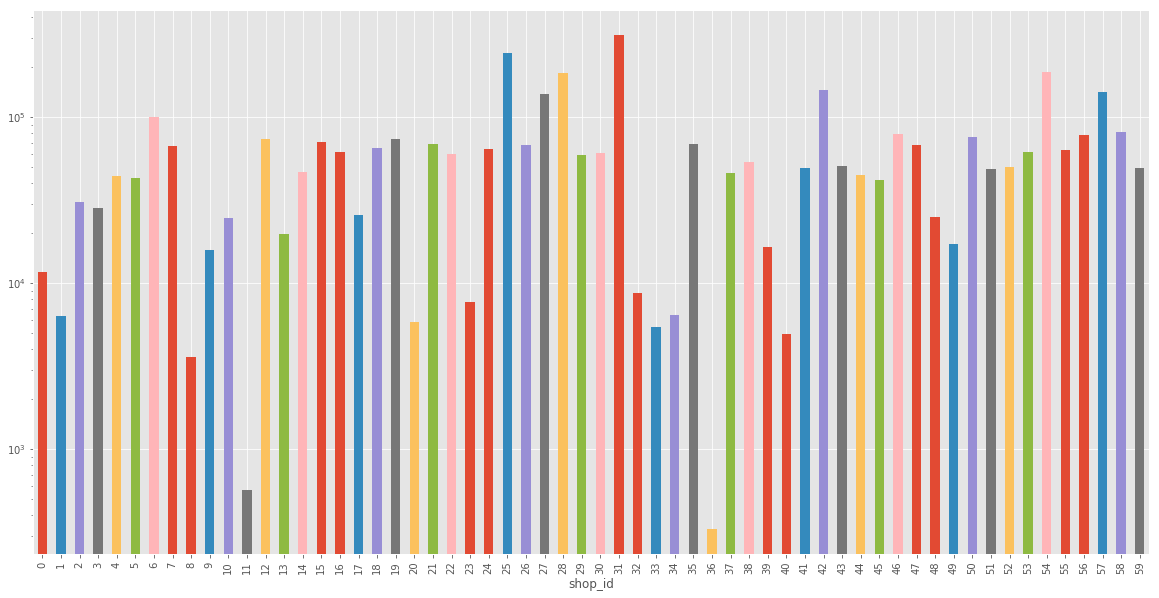

In [22]:
shop_total_sales_to_date.plot(kind='bar', figsize=(20,10), logy=True)

In [23]:
print("Shop with minimum sales of {:,.0f} is {}".format( shop_total_sales_to_date.min(), shop_total_sales_to_date.idxmin()))
print("Shop with the max sales of {:,.0f} is {}".format( shop_total_sales_to_date.max(), shop_total_sales_to_date.idxmax()))

Shop with minimum sales of 330 is 36
Shop with the max sales of 310,777 is 31


In [24]:
train_df.index.min()

Timestamp('2013-01-01 00:00:00')

In [25]:
train_df.index.max()

Timestamp('2015-12-10 00:00:00')

Look how metrics is effected my item class

## Create New Features

- revenue
- mean revenue per item for each shop daily
- mean revenue per item for each shop weekly
- time between each item category sale
- holidays

In [26]:
# need to create item class from the other data frame
#train_df['Category'] = train_df.item_id.apply( lambda x: itemid_to_category[x])
train_df['Category'] = train_df.item_id.map(itemid_to_category)

In [27]:
train_df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,Year,Month,Day,WeekOfYear,Category
date,,,,,,,,,,
2013-01-01,0,46,18616,349.0,1.0,2013,1,1,1,40
2013-01-01,0,54,11854,199.0,1.0,2013,1,1,1,63
2013-01-01,0,28,4906,1799.0,1.0,2013,1,1,1,19
2013-01-01,0,42,2931,99.0,1.0,2013,1,1,1,30
2013-01-01,0,54,11604,349.0,1.0,2013,1,1,1,40


In [28]:
train_df['Revenue'] = train_df['item_cnt_day']  * train_df['item_price']


In [29]:
train_df['Revenue'].describe()

count    2.935849e+06
mean     1.157732e+03
std      5.683604e+03
min     -6.897000e+04
25%      2.490000e+02
50%      4.490000e+02
75%      1.078200e+03
max      1.829990e+06
Name: Revenue, dtype: float64

In [30]:
train_df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,Year,Month,Day,WeekOfYear,Category,Revenue
date,,,,,,,,,,,
2013-01-01,0,46,18616,349.0,1.0,2013,1,1,1,40,349.0
2013-01-01,0,54,11854,199.0,1.0,2013,1,1,1,63,199.0
2013-01-01,0,28,4906,1799.0,1.0,2013,1,1,1,19,1799.0
2013-01-01,0,42,2931,99.0,1.0,2013,1,1,1,30,99.0
2013-01-01,0,54,11604,349.0,1.0,2013,1,1,1,40,349.0


In [32]:
train_df.groupby('Category').item_cnt_day.describe().T

Category,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
count,3.0,2.0,18461.000000,25283.000000,2304.000000,7231.000000,18498.000000,4459.000000,1877.000000,2193.000000,...,56.000000,42603.000000,3746.000000,3703.00000,2346.000000,9067.000000,1325.000000,795.000000,4390.000000,7206.000000
mean,1.0,1.0,1.061535,1.178934,1.044705,1.025169,1.106714,1.201615,7.298348,8.261742,...,1.053571,1.131939,1.507475,1.05320,1.087383,1.745892,4.630943,1.213836,2.377449,1.669720
std,0.0,0.0,0.348973,0.675685,0.390061,0.226043,0.444056,0.900345,26.652815,49.913519,...,0.227208,0.815289,1.308113,0.32479,1.378031,1.317237,25.055415,0.597695,2.245147,1.220569
min,1.0,1.0,-2.000000,-2.000000,-2.000000,-1.000000,-1.000000,-2.000000,-9.000000,-2.000000,...,1.000000,-2.000000,1.000000,-1.00000,1.000000,1.000000,-1.000000,-1.000000,1.000000,-2.000000
25%,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000
75%,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,7.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000,3.000000,1.000000,3.000000,2.000000
max,1.0,1.0,6.000000,20.000000,9.000000,4.000000,13.000000,17.000000,637.000000,2169.000000,...,2.000000,110.000000,28.000000,7.00000,61.000000,21.000000,669.000000,6.000000,50.000000,29.000000


What the most poplular item... lets plot this info

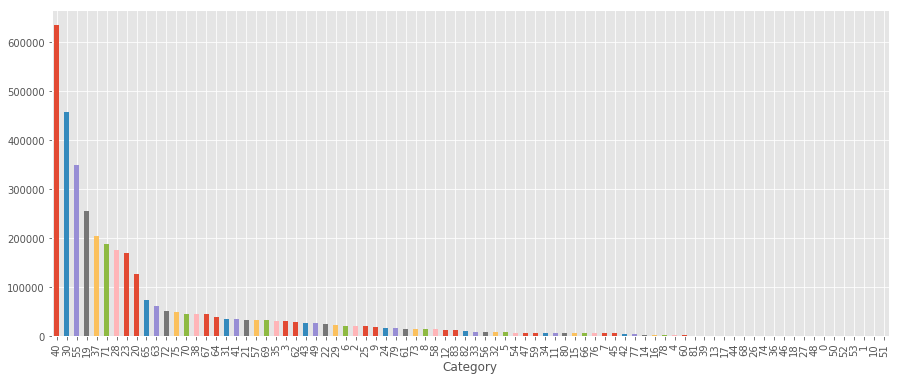

In [33]:
items_sold_by_category = train_df.groupby('Category').item_cnt_day.sum()
items_sold_by_category.sort_values(inplace=True, ascending=False)
plt.figure(figsize=(15,6))
items_sold_by_category.plot(kind='bar')

Most popular item to be sold are DVDs

In [34]:
# top 5 categories sold
top_5_cat_ids = items_sold_by_category.iloc[:5].index.values
top_5_cat_ids

array([40, 30, 55, 19, 37], dtype=int64)

In [35]:
item_categories[item_categories.item_category_id.isin(top_5_cat_ids)]

,item_category_name,item_category_id
19,Игры - PS3,19
30,Игры PC - Стандартные издания,30
37,Кино - Blu-Ray,37
40,Кино - DVD,40
55,Музыка - CD локального производства,55


Popular items sold
1. DVDs
2. PC Games
3. Music CDs
4. PS3 Games
5. Films - BluRay


In [ ]:
item_dataset.head()


Shop id 36 has the lowest sales data

Get all records of shop 36 to see if there is missing data for it or if it's a shop that hasn't long been open

In [46]:
shop_36 = train_df[train_df.shop_id == 36]
shop_36.index.min()
shop_36.index.max()

Timestamp('2015-10-18 00:00:00')

Timestamp('2015-10-31 00:00:00')

There's only a months worth of data for the shop with the min sales, the last month of timeline of the data

In [47]:
train_df[40:80]

,date_block_num,shop_id,item_id,item_price,item_cnt_day,Year,Month,Day,WeekOfYear,Category,Revenue
date,,,,,,,,,,,
2013-01-01,0,2,8665,299.0,1.0,2013,1,1,1,40,299.0
2013-01-01,0,28,3698,599.0,1.0,2013,1,1,1,21,599.0
2013-01-01,0,2,6916,999.5,1.0,2013,1,1,1,19,999.5
2013-01-01,0,54,11381,199.0,1.0,2013,1,1,1,43,199.0
2013-01-01,0,41,11391,899.0,1.0,2013,1,1,1,19,899.0
2013-01-01,0,54,10715,399.0,1.0,2013,1,1,1,40,399.0
2013-01-01,0,54,11184,199.0,2.0,2013,1,1,1,55,398.0
2013-01-01,0,46,7820,2290.0,1.0,2013,1,1,1,75,2290.0
2013-01-01,0,8,7483,349.0,1.0,2013,1,1,1,55,349.0


Ordering of how the data was extracted is:-
* item_id
    * shop_id
        * date

In [49]:
train_df[train_df.item_id==2833].head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,Year,Month,Day,WeekOfYear,Category,Revenue
date,,,,,,,,,,,
2013-01-01,0,28,2833,599.0,1.0,2013,1,1,1,30,599.0
2013-01-01,0,18,2833,599.0,1.0,2013,1,1,1,30,599.0
2013-01-02,1,47,2833,599.0,1.0,2013,1,2,1,30,599.0
2013-01-03,2,41,2833,299.0,1.0,2013,1,3,1,30,299.0
2013-01-03,2,27,2833,299.0,1.0,2013,1,3,1,30,299.0


### Lets first just focus on the shop that has the most data, shop_id 31 with 310,777 samples

In [50]:
shop_31 = train_df[ train_df.shop_id == 31 ].copy()

In [51]:
shop_31.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,Year,Month,Day,WeekOfYear,Category,Revenue
date,,,,,,,,,,,
2013-01-02,1,31,20236,299.0,1.0,2013,1,2,1,40,299.0
2013-01-02,1,31,15256,1199.0,1.0,2013,1,2,1,63,1199.0
2013-01-02,1,31,16786,249.0,1.0,2013,1,2,1,43,249.0
2013-01-02,1,31,20251,299.0,1.0,2013,1,2,1,40,299.0
2013-01-02,1,31,20228,299.0,1.0,2013,1,2,1,40,299.0


In [ ]:
# Drop the string date column as don't need it...
#shop_31.drop(columns=['date'], inplace=True)

In [ ]:
#shop_31.rename(columns={'date2':'date'}, inplace=True)

In [ ]:
#col_list = shop_31.columns
#col_list


In [ ]:
#shop_31 = shop_31[col_list[:-1].insert(0, 'date')]

In [52]:
# What is the number of *unique* items this shops sells?...
shop_31_unique_items = shop_31.item_id.value_counts()
print("Number unique items sold in shop 31 is {:,.0f}".format( len(shop_31_unique_items) ) )

Number unique items sold in shop 31 is 14,416


In [53]:
shop_31.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235636 entries, 2013-01-02 to 2015-12-10
Data columns (total 11 columns):
date_block_num    235636 non-null int64
shop_id           235636 non-null int64
item_id           235636 non-null int64
item_price        235636 non-null float64
item_cnt_day      235636 non-null float64
Year              235636 non-null int64
Month             235636 non-null int64
Day               235636 non-null int64
WeekOfYear        235636 non-null int64
Category          235636 non-null int64
Revenue           235636 non-null float64
dtypes: float64(3), int64(8)
memory usage: 21.6 MB


In [ ]:
# sort the dataframe by date...
#shop_31.sort_values(by='date',ascending=True, inplace=True)
#shop_31.head()

Look at the pattern of number of items sold per month, number of different items sold per month

In [54]:
shop_31_itemcnt_per_day = shop_31.groupby('date', sort=False).item_cnt_day.sum()

In [65]:
import matplotlib.dates as mdates

In [80]:
the_years= mdates.YearLocator()
the_months=mdates.MonthLocator()
the_day = mdates.DayLocator()
date_format = mdates.DateFormatter('%d-%m-%y')


In [83]:
def onclick(event):
    txt = ('x={} y={}, xdata={}, ydata={}'.format(event.x, event.y, event.xdata, event.ydata))

In [100]:
xlabeldict ={'family': 'serif',
            'size': 8}

<IPython.core.display.Javascript object>


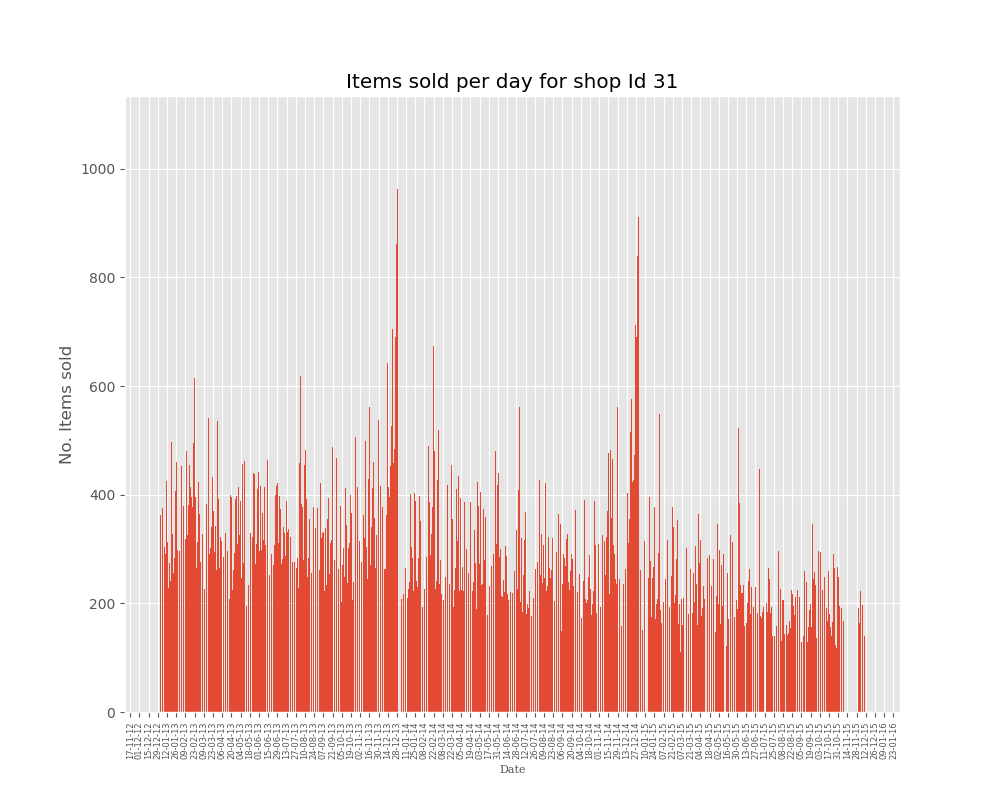

In [114]:
%matplotlib notebook

fig, ax = plt.subplots( figsize = (10,8))
the_plot_text = ax.text(0,0,"test", va='bottom', ha='left')

def onclick2(event):
    print("*********************")
    txt = ('x={} y={}, xdata={}, ydata={}'.format(event.x, event.y, event.xdata, event.ydata))
    the_plot_text.set_text('hellp')
    
    
cid = fig.canvas.mpl_connect('button_press_event', onclick2)
plt.bar( shop_31_itemcnt_per_day.index, shop_31_itemcnt_per_day)
plt.title('Items sold per day for shop Id 31')
plt.xlabel('Date',fontdict=xlabeldict)
plt.ylabel('No. Items sold')
plt.xticks(rotation=90);
ax.xaxis.set_tick_params(labelsize=6)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=14));
ax.xaxis.set_major_formatter(date_format);

#plt.xticks(np.arange(shop_31_itemcnt_per_day.index.min(), shop_31_itemcnt_per_day.index.max(), 1))

Why is there a gap of missing data ?

In [136]:
y = shop_31_itemcnt_per_day.resample('MS').sum()

In [134]:
y.head()

date
2013-01-02    362.0
2013-01-03    378.0
2013-01-04    212.0
2013-01-05    375.0
2013-01-06    406.0
Freq: D, Name: item_cnt_day, dtype: float64

<IPython.core.display.Javascript object>


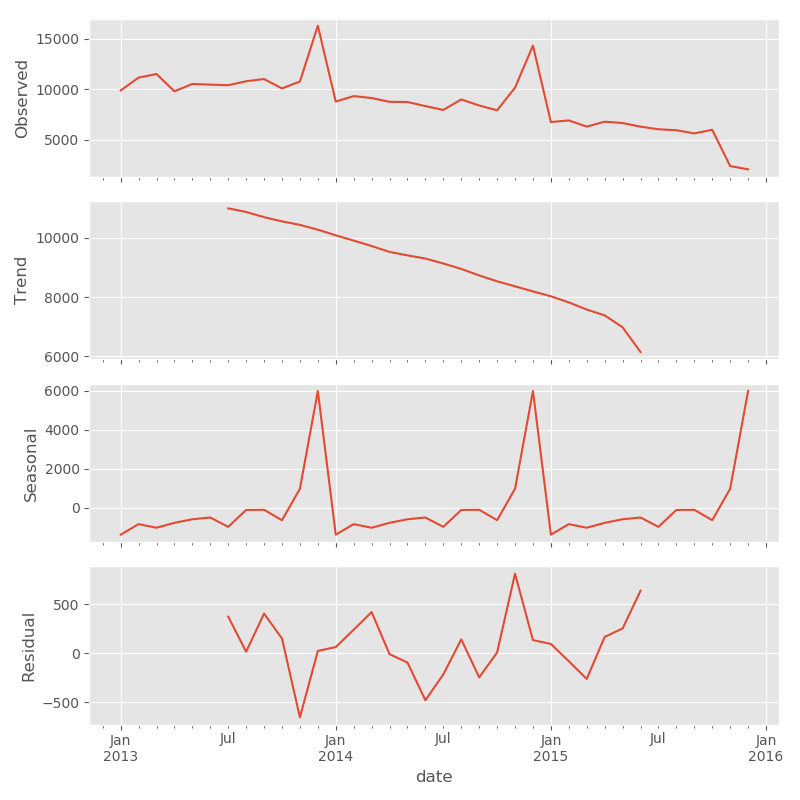

In [138]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize']=8,8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig2 = decomposition.plot()
plt.show()

Looks like net sales are dropping as time goes by due to the downward trend of items sold , it is also clear there is a large increase in sales Dece ber due to xmas

In [141]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [203]:
import statsmodels.api as sm
res_dict={}
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            res_dict['{}x{}'.format(param,param_seasonal)]=results.aic
        except:
            continue
            
# get the min AIC value
AIC_array = np.array(list(res_dict.values()))
indx_min_val = AIC_array.argmin()
params_use = list(res_dict.keys())[indx_min_val]

F:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:738.999507327864
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:444.67086736755556
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:441.9102260179247
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:233.3717013399234
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:697.3786412215293
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:415.5668929149019
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:436.9663378713167
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:234.75312809490092
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:626.3296133263211
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:392.4401719265952
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:404.7211915836376
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:205.25393217889618
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:602.1983635269015
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:375.49845200556905
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:406.1275540312574
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:202.31702916650846
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:644.7037497511676
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:407.30220247136714
ARIMA

In [327]:
import re
p1 = re.compile('\({\d, \d, \d}\)')

In [261]:
p2 = re.compile('\(\d, \d, \d, \d+\)')

In [331]:
p1_var=p1.match(params_use).group()



AttributeError: 'NoneType' object has no attribute 'group'

In [314]:
type(p1_var)

str

In [315]:

toMatch=params_use
p2_var=p2.match(toMatch[-13:]).group()

In [348]:
my_tuple = x for x in p2_var[1:-1] if x.isdigit() == True)

SyntaxError: invalid syntax (<ipython-input-348-12670ae45835>, line 1)

In [353]:
mystr ='1, 2, 13'
mystr.split(',')
my_other_tuple = [(int(x)) for x in mystr.split(',')]
#my_other_tuple2 = (my_other_tuple[0], my_other_tuple[1], my_other_tuple[2])
my_other_tuple2 = tuple(my_other_tuple)
my_other_tuple2

['1', ' 2', ' 13']

(1, 2, 13)

In [ ]:
def list_to_tuple_from_str( the_str ):
    the_str_list = the_str.split(',')
    

In [ ]:
model = sm.tsa.statespace.SARIMAX(y,
                                 order=p1_var,
                                 seasonal_order=p2_var)

In [ ]:
# num items sold per month...
shop_31_itemcnt_per_month = shop_31.groupby([shop_31['date'].dt.strftime('%y'),shop_31['date'].dt.strftime('%B'), shop_31['item_id']] , sort=False).item_cnt_day.sum()

In [ ]:
# num items sold per month...
shop_31_itemcnt_per_month = shop_31.groupby([shop_31['date'].dt.strftime('%B %Y')] , sort=False).item_cnt_day.sum()

In [ ]:
shop_31_itemcnt_per_month

In [ ]:
shop_31_itemcnt_per_month.plot(kind='bar')

In [ ]:
axis = plt.subplots( figsize = (25,10))
plt.bar( shop_31_itemcnt_per_month.index, shop_31_itemcnt_per_month)
plt.title('Items sold per month for shop Id 31')
plt.xlabel('Month')
plt.ylabel('No. Items sold')
plt.xticks(rotation=90);

Investigate unique item sales per month

In [ ]:
shop_31_unique_items_per_month = shop_31.groupby([shop_31['item_id']]).item_cnt_day.sum()

\\( P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} \\)

\\( P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} \\)

In [ ]:
shop_31_unique_items_per_month

In [ ]:
axis = plt.subplots( figsize = (25,10))
plt.bar( shop_31_unique_items_per_month.index, shop_31_unique_items_per_month)
plt.title('Items sold per month for shop Id 31, per item type')
plt.xlabel('Month')
plt.ylabel('No. Items sold')
plt.xticks(rotation=90);

In [ ]:
%lsmagic

In [ ]:
x = range(1000)
y = [i ** 2 for i in x]
plt.plot(x,y)
plt.show();

In [ ]:
%config InlineBackend.figure_format = 'retina'
plt.plot(x,y)
plt.show();

<IPython.core.display.Javascript object>


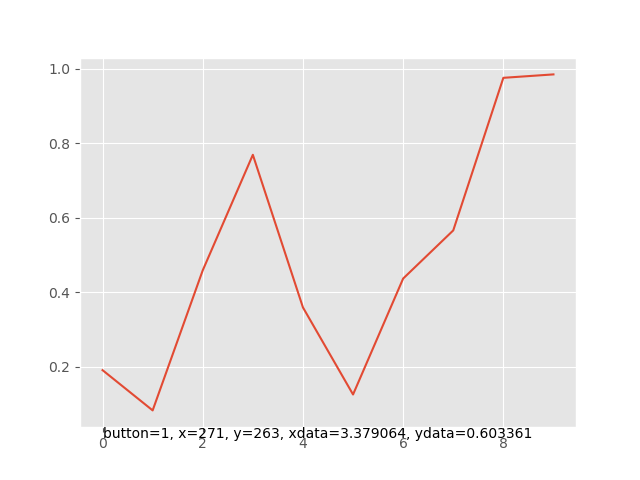

In [109]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.plot(np.random.rand(10))
text=ax.text(0,0,"",va='bottom',ha='left')
def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %(event.button, event.x, event.y, event.xdata, event.ydata)
    text.set_text(tx)

cid = fig.canvas.mpl_connect('button_press_event', onclick)